In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
df=pd.read_csv(r"C:\Users\Johaa\Desktop\ML PROJECTS\DUPLICATE QUESTION PAIRS\train.csv")
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [16]:
df.dropna(inplace=True)

In [17]:
df=df.sample(30000,random_state=32)

In [18]:
df["is_duplicate"].value_counts()

0    18925
1    11075
Name: is_duplicate, dtype: int64

<Axes: xlabel='is_duplicate', ylabel='count'>

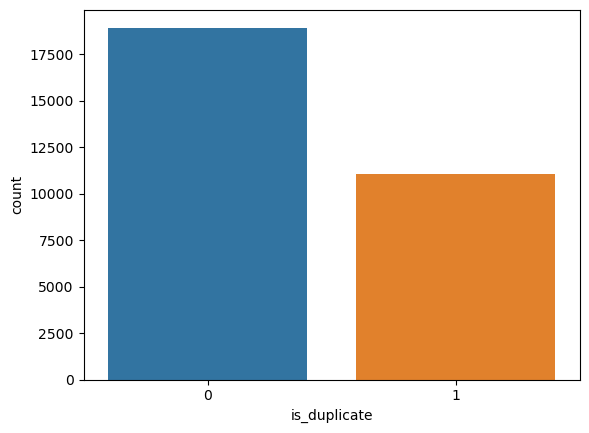

In [19]:
sns.countplot(data=df,x="is_duplicate")

## CREATING NEW FEATURES

### New features include
1) q1 length
2) q2 length
3) q1 words
4) q2 words
5) words common
6) words total
7) word share

In [22]:
df["q1_words"]=df["question1"].apply(lambda x: len (x.split()))

In [23]:
df["q2_words"]=df["question2"].apply(lambda x: len(x.split()))

In [20]:
df["q1_len"]=df["question1"].str.len()
df["q2_len"]=df["question2"].str.len()

In [24]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
82945,82945,22537,35048,Why do people insist on driving slowly in the ...,Why do some people drive slowly (10+ MPH under...,1,66,84,12,16
387000,387000,519291,9335,What will be the effect on H1B visas if Trump ...,Will Donald Trump end the H1B visa program ent...,1,67,74,13,12
280233,280233,98060,264790,How can WE TOGETHER Make the World a Better Pl...,How can I make this world a better place?,1,50,41,10,9
272582,272582,45809,9430,What should do to reduce hair fall?,What can we do for hair loss?,1,35,29,7,7
46957,46957,83905,83906,Is it common for a therapist to ask you to kee...,What are some strong markets right now and tha...,0,82,79,17,15
...,...,...,...,...,...,...,...,...,...,...
397233,397233,530349,530350,Why do cats spit hairballs? Is it harmful?,What is the reason why cats cough hairballs?,1,42,44,8,8
104038,104038,171837,171838,Who was the first Hindu?,What is the first step on becoming a Hindu?,0,24,43,5,9
64215,64215,111622,103715,How much do colleges really care about grades ...,"When recruiting, do colleges look at freshman ...",1,80,78,14,13
310531,310531,329151,91094,"What is the weather in Orlando like on June, a...","What is the weather in Orlando like on June, a...",0,95,96,19,19


In [29]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row["question1"].split()))
    w2=set(map(lambda word: word.lower().strip(),row["question2"].split()))
    
    return len(w1&w2)

In [30]:
df["word_common"]=df.apply(common_words,axis=1)

In [32]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row["question1"].split()))
    w2=set(map(lambda word: word.lower().strip(),row["question2"].split()))
    
    return len(w1) +len(w2)

In [33]:
df["total_words"]=df.apply(total_words,axis=1)

In [35]:
df["word_share"]=round(df["word_common"]/df["total_words"],2)

In [38]:
corpus=list(df["question1"])+list(df["question2"])

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=3000)
temp_df=pd.DataFrame(cv.fit_transform(corpus).toarray())
temp_df_1=temp_df[0:30000]
temp_df_1.index=df.index
temp_df_2=temp_df[30000:60000]
temp_df_2.index=df.index
new_final_df=pd.concat([temp_df_1,temp_df_2],axis=1,ignore_index=True)

In [48]:
y=df["is_duplicate"]

In [50]:
df.drop(columns=["is_duplicate"],inplace=True)

In [51]:
final_df=pd.concat([new_final_df,df],axis=1,ignore_index=True)

In [52]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,5997,5998,5999,6000,6001,6002,6003,6004,6005,6006
82945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,66,84,12,16,7,27,0.26
387000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,67,74,13,12,6,25,0.24
280233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,50,41,10,9,7,19,0.37
272582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,35,29,7,7,3,14,0.21
46957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,82,79,17,15,1,29,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,42,44,8,8,4,16,0.25
104038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,24,43,5,9,3,14,0.21
64215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,80,78,14,13,5,26,0.19
310531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,95,96,19,19,15,32,0.47


In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(final_df,y,test_size=0.1)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

acs=accuracy_score(y_test,y_pred)
acs

0.7726666666666666